In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.6 (default, Nov 23 2017, 15:49:48) 
[GCC 4.8.4]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.0.2
pandas: 0.22.0
sklearn: 0.19.1


In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
# Load dataset
url = "/home/mindfire/Tech/OpenSourceProjects/CustomerRankingAndPrediction/CustomerData.csv"
names = ['region', 'in_store', 'age', 'items', 'amount']

dataset = pandas.read_csv(url, names=names)

In [42]:
# shape
print(dataset.shape)

(80000, 5)


In [43]:
# head
print(dataset.head(20))

                                 region  in_store  age  items     amount
Carter Stokes    NaN                  2         0   37      4   281.0300
Jacob Jerde      NaN                  2         0   35      2   219.5100
Tressa Ratke     192.90.208.202       4         1   45      3  1525.7000
Rudolf Abshire   251.55.128.164       3         1   46      3   715.2500
Theresa Davis    182.19.192.186       1         1   33      4  1937.5000
Rich Bartell     NaN                  4         0   24      3  1314.2000
Brooks Kutch     NaN                  2         0   43      6     8.5472
Keitha Mosciski  173.45.123.122       3         1   66      5   819.9800
Hortense Streich 15.181.154.173       1         1   51      5   908.3100
Carl Price       157.195.240.69       1         1   47      3   767.5400
Scot Rolfson     125.149.221.56       3         1   44      5   122.3900
Donald Heaney    70.8.139.33          1         1   33      2   684.3200
Troy Kertzmann   NaN                  2         0  

In [45]:
# descriptions
print(dataset.describe())

             region      in_store           age         items        amount
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000
mean       2.675000      0.500000     45.757925      4.504975    835.919670
std        1.126672      0.500003     15.715679      2.061238    721.273736
min        1.000000      0.000000     18.000000      1.000000      5.004700
25%        2.000000      0.000000     33.000000      3.000000    285.140000
50%        3.000000      0.500000     45.000000      4.000000    582.315000
75%        4.000000      1.000000     56.000000      6.000000   1233.700000
max        4.000000      1.000000     85.000000      8.000000   3000.000000


In [46]:
# in_store distribution
print(dataset.groupby('in_store').size())

in_store
0    40000
1    40000
dtype: int64


In [47]:
# age distribution
print(dataset.groupby('age').size())

age
18     223
19     743
20    1009
21     937
22     976
23     957
24    1197
25    1465
26    1355
27    1367
28    1661
29    1752
30    1747
31    1748
32    1789
33    1745
34    1783
35    1731
36    1784
37    1718
38    1746
39    1772
40    1692
41    1754
42    1785
43    1765
44    1763
45    1727
46    1775
47    1768
      ... 
56    1192
57    1172
58    1222
59    1185
60    1184
61    1136
62    1239
63     979
64     793
65     718
66     750
67     751
68     729
69     736
70     755
71     731
72     742
73     681
74     576
75     334
76     329
77     363
78     369
79     321
80     344
81     371
82     385
83     380
84     373
85     185
Length: 68, dtype: int64


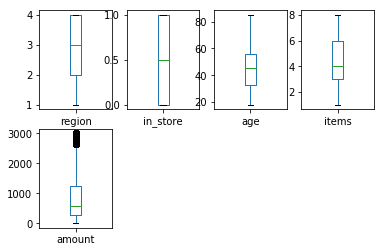

In [48]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

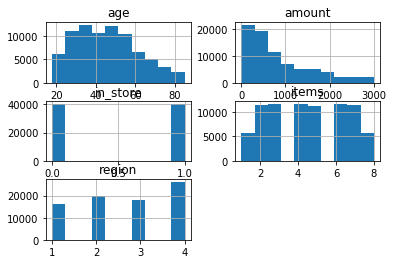

In [49]:
# histograms
dataset.hist()
plt.show()

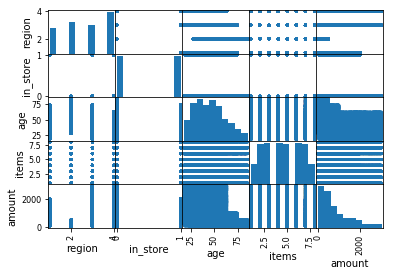

In [50]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [51]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [52]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [58]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: Unknown label type: 'continuous'